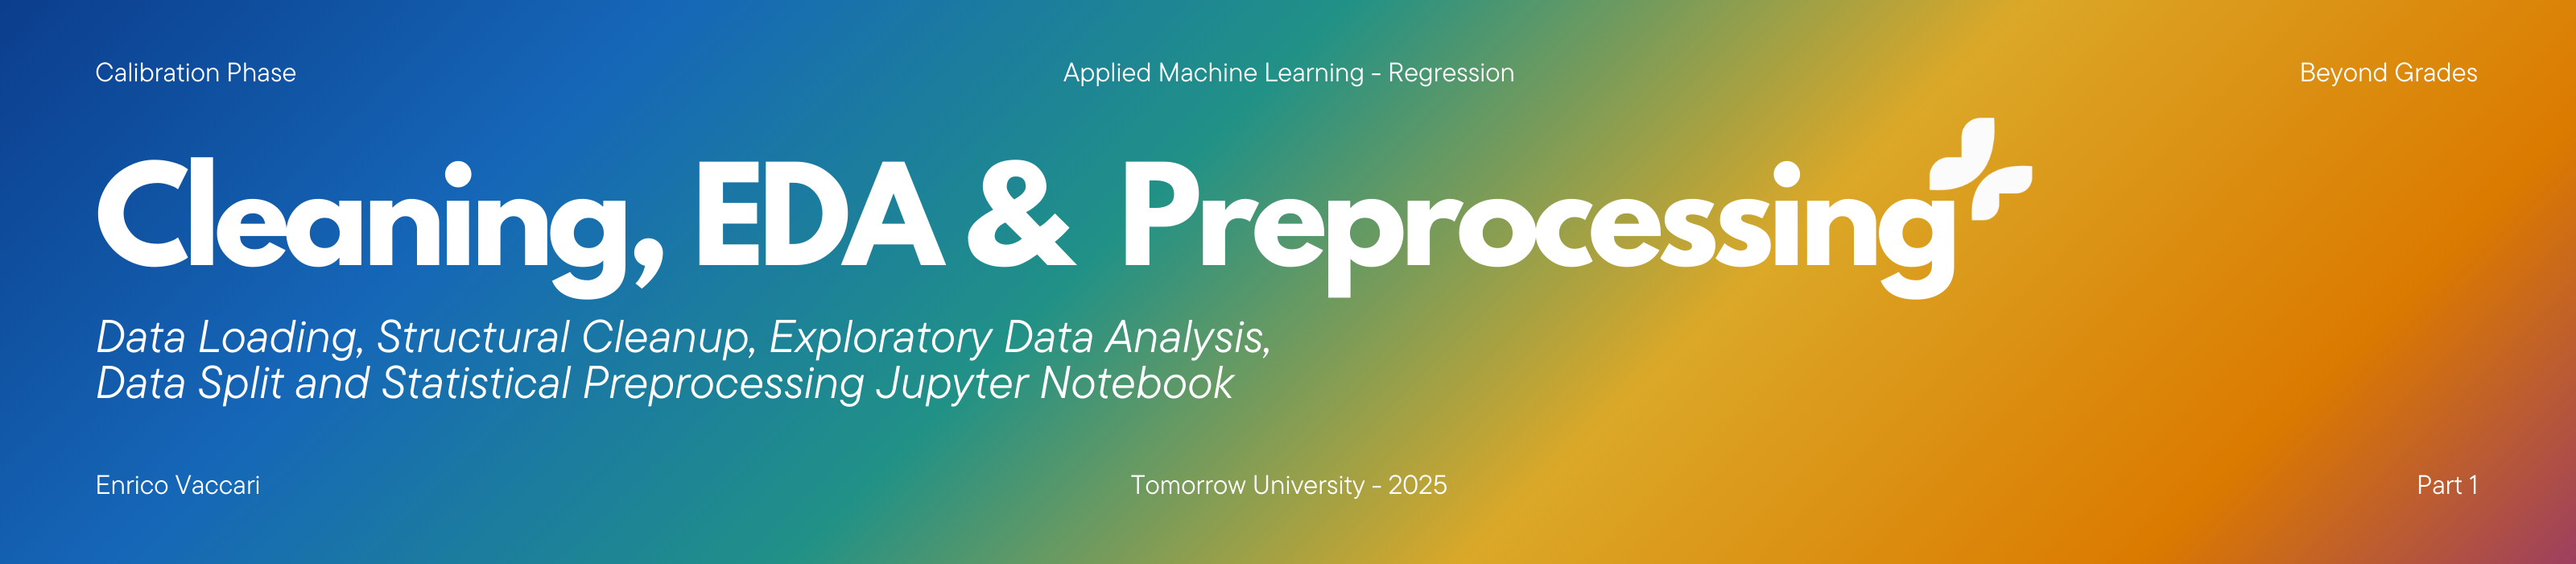

In [2]:
from IPython.display import Image, HTML, display
display(Image("../extra/images/Beyond_Grades_Banner_01.png", width=1600))

## SETUP PROJECT AND PATH to src\

why: in jupyter notebook I can't use __file__ to get to the project dir, so I need to use Path-cwd

In [18]:
import sys
import importlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

In [19]:

# -------------------------------------------------------------------
# VARIABLES
# -------------------------------------------------------------------

# Project root = one folder above the current notebook
try:
    PROJECT_ROOT = Path(__file__).resolve().parent.parent
except NameError:  # when running inside Jupyter
    PROJECT_ROOT = Path.cwd().resolve().parent


# Path to src folder
SRC_PATH = PROJECT_ROOT / "src"

# Add src to sys.path if not already there
if str(SRC_PATH) not in sys.path:
    sys.path.insert(0, str(SRC_PATH))

# -------------------------------------------------------------------
# IMPORT UTILS
# -------------------------------------------------------------------

import utils
importlib.reload(utils)  # so edits to utils.py are reflected without restarting kernel
print("utils.py imported from:", SRC_PATH)

utils.py imported from: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\src


In [20]:
csv_path = utils.get_student_csv_path()
print(csv_path)

C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\raw\student_performance_data_2025.csv


In [21]:

try:
    df = utils.load_student_csv(csv_path)
    print('Data loaded successfully.')
except Exception as e:
    print(f'An error occurred during data loading: {e}')

utils.save_dataset(df, '01_dataset_raw.xlsx')

Data loaded successfully.
✅ File saved at: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\processed\01_dataset_raw.xlsx


In [22]:
# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset (including columns types)
print(df.info())

# A quick peek at the data shape
print('Dataset shape:', df.shape)

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [23]:
# DUPLICATES

# Dataset has already been cleaned 

# Check for exact duplicates across all columns
exact_duplicates = df.duplicated().sum()
print(f"Exact duplicates found: {exact_duplicates}")

# View duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print(f"Total rows involved in duplication: {len(duplicate_rows)}")

# Check duplicates on specific key columns
#key_duplicates = df.duplicated(subset=['sensor_id', 'timestamp']).sum()
#print(f"Duplicates based on sensor and time: {key_duplicates}")


# Remove exact duplicates (keep first occurrence)
df_cleaned = df.drop_duplicates(keep='first')

# For key-based duplicates, investigate first
# duplicate_keys = df[df.duplicated(subset=['sensor_id', 'timestamp'], keep=False)]
# print("Duplicate key patterns:")
# print(duplicate_keys.groupby(['sensor_id', 'timestamp']).size().sort_values(ascending=False))

# Remove duplicates based on key columns after investigation
 # df_cleaned = df.drop_duplicates(subset=['sensor_id', 'timestamp'], keep='first')

# Document the cleaning decision
cleaning_log = {
    'original_rows': len(df),
    'exact_duplicates_removed': len(df) - len(df_cleaned),
    'final_rows': len(df_cleaned)
}
print(f"Cleaning summary: {cleaning_log}")


# Always document your duplicate handling decisions
#with open('data_cleaning_log.txt', 'w') as f:
    #f.write(f"Duplicate removal on {pd.Timestamp.now()}\n")
    #f.write(f"Original dataset: {len(df)} rows\n")
    #f.write(f"Exact duplicates removed: {exact_duplicates}\n")
    #f.write(f"Key-based duplicates removed: {key_duplicates}\n")
    #f.write(f"Final dataset: {len(df_cleaned)} rows\n")



Exact duplicates found: 0
Total rows involved in duplication: 0
Cleaning summary: {'original_rows': 2392, 'exact_duplicates_removed': 0, 'final_rows': 2392}


In [24]:
# MISSING VALUES

missing_values = df_cleaned.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# In this dataset, it seems we don't have missing values. If you encounter missing values in your data,
# consider using methods like fillna() or dropna() based on your analytical needs.

Missing values in each column:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [25]:
# value counts for categorical features
print(df_cleaned['Age'].value_counts())
print(df_cleaned['Ethnicity'].value_counts())
print(df_cleaned['ParentalEducation'].value_counts())
print(df_cleaned['Tutoring'].value_counts())
print(df_cleaned['ParentalSupport'].value_counts())
print(df_cleaned['Extracurricular'].value_counts())
print(df_cleaned['Sports'].value_counts())
print(df_cleaned['Music'].value_counts())
print(df_cleaned['Volunteering'].value_counts())

# This also shows there are no format inconsistencies amongst the cateogorical features

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64
Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64
Tutoring
0    1671
1     721
Name: count, dtype: int64
ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64
Extracurricular
0    1475
1     917
Name: count, dtype: int64
Sports
0    1666
1     726
Name: count, dtype: int64
Music
0    1921
1     471
Name: count, dtype: int64
Volunteering
0    2016
1     376
Name: count, dtype: int64


In [26]:
import pandas as pd

def identify_quality_issues(
    df: pd.DataFrame,
    study_time_col: str = "StudyTimeWeekly",
    drop_grade_class: bool = True,
    study_time_min: float = 0.0,
    study_time_max: float = 100.0,
    remove_absurd_study_times: bool = True
):
    """
    - Drop 'StudentID' se presente
    - (Opzionale) drop 'GradeClass'
    - Converte study_time a numerico, riporta min/max e rimuove valori fuori [study_time_min, study_time_max] se richiesto
    """
    issues = {}
    df_clean = df.copy()

    # 1) Drop colonne
    dropped_cols = []
    if "StudentID" in df_clean.columns:
        df_clean = df_clean.drop(columns=["StudentID"])
        dropped_cols.append("StudentID")

    if drop_grade_class and "GradeClass" in df_clean.columns:
        df_clean = df_clean.drop(columns=["GradeClass"])
        dropped_cols.append("GradeClass")

    if dropped_cols:
        issues["dropped_columns"] = dropped_cols

    # 2) Controlli su study_time
    if study_time_col in df_clean.columns:
        original = df_clean[study_time_col]
        # conta quanti valori non numerici diventano NaN
        coerced = pd.to_numeric(original, errors="coerce")
        non_numeric_count = coerced.isna().sum() - original.isna().sum()

        df_clean[study_time_col] = coerced
        valid = df_clean[study_time_col].dropna()

        issues["study_time_min"] = float(valid.min()) if not valid.empty else None
        issues["study_time_max"] = float(valid.max()) if not valid.empty else None
        issues["study_time_non_numeric_coerced"] = int(max(non_numeric_count, 0))

        # individua valori fuori range
        absurd_mask = (df_clean[study_time_col] < study_time_min) | (df_clean[study_time_col] > study_time_max)
        absurd_count = int(absurd_mask.sum())
        issues["study_time_out_of_range"] = {"count": absurd_count, "range_used": [study_time_min, study_time_max]}

        # rimuovi righe fuori range
        if remove_absurd_study_times and absurd_count > 0:
            df_clean = df_clean.loc[~absurd_mask].copy()
            issues["rows_removed_for_absurd_study_time"] = absurd_count
    else:
        issues["study_time_missing"] = True

    return df_clean, issues


df_cleaned2, issues = identify_quality_issues(
    df_cleaned,
    study_time_col="StudyTimeWeekly",
    drop_grade_class=True,
    study_time_min=0,
    study_time_max=100,
    remove_absurd_study_times=True
)

print(issues)

{'dropped_columns': ['StudentID', 'GradeClass'], 'study_time_min': 0.001056538645936, 'study_time_max': 19.97809399526153, 'study_time_non_numeric_coerced': 0, 'study_time_out_of_range': {'count': 0, 'range_used': [0, 100]}}


The fact that study time is measured with decimals (0.001 h, 0.02 h, etc.) strongly suggests an automated system (like an app) that is logging precise usage time.

If this is the case, then those tiny values are not random noise, but actual signals: students who logged in briefly, barely studied, but may still have attempted the test.

In fact, keeping them could even be valuable: they’re the extreme end of the “low-engagement” group, and you’d expect them to correlate with poor performance.

In [27]:
df_cleaned2.info()
lowest_30 = df_cleaned2["StudyTimeWeekly"].nsmallest(30)
print(lowest_30)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 243.1 KB
2011    0.001057
949     0.004859
87      0.008031
1330    0.008206
619     0.014337
556     0.015790
2262    0.018117
4

Double check of low valeus Check distribution vs. grades

Before deciding, plot a boxplot or scatter of study_time_weekly vs final_grade.

If those near-zero values consistently map to low grades, then they’re useful.

If they look random, maybe they’re noise.

In [28]:
import re
from datetime import datetime
from typing import Dict, Any, Tuple, Optional

import numpy as np
import pandas as pd


import re
from datetime import datetime
from typing import Dict, Any, Tuple, Optional
import numpy as np
import pandas as pd


def data_quality_check(
    df: pd.DataFrame,
    study_time_col: str = "StudyTimeWeekly",
    gpa_col: str = "GPA",
    absences_col: str = "Absences",
    date_like_cols: Optional[list] = None,
    drop_student_id: bool = True,
    drop_grade_class: bool = True,
    study_time_range: Tuple[float, float] = (0.0, 100.0),
    remove_study_time_out_of_range: bool = False
) -> tuple[pd.DataFrame, Dict[str, Any]]:
    """Always returns a full report dictionary, with 'ok' when no issues are found."""

    report: Dict[str, Any] = {}
    out = df.copy()

    # ---- structural ----
    dropped = []
    if drop_student_id and "StudentID" in out.columns:
        out.drop(columns=["StudentID"], inplace=True)
        dropped.append("StudentID")
    if drop_grade_class:
        for gc in ("grade_class", "GradeClass"):
            if gc in out.columns:
                out.drop(columns=[gc], inplace=True)
                dropped.append(gc)
    report["dropped_columns"] = dropped if dropped else "ok"

    # ---- study time ----
    study_report = {}
    if study_time_col in out.columns:
        raw_na = out[study_time_col].isna().sum()
        st = pd.to_numeric(out[study_time_col], errors="coerce")
        coerced_to_nan = int(max(st.isna().sum() - raw_na, 0))
        study_report["non_numeric_coerced"] = coerced_to_nan
        if st.notna().any():
            study_report["min"] = float(st.min())
            study_report["max"] = float(st.max())
        else:
            study_report["min"], study_report["max"] = None, None
        lo, hi = study_time_range
        oor = (st < lo) | (st > hi)
        study_report["out_of_range"] = {
            "count": int(oor.sum()),
            "range_used": [lo, hi]
        }
        out[study_time_col] = st
        if remove_study_time_out_of_range and oor.any():
            out = out.loc[~oor].copy()
            study_report["rows_removed"] = int(oor.sum())
    else:
        study_report["status"] = "missing"
    report["study_time"] = study_report

    # ---- GPA ----
    gpa_report = {}
    if gpa_col in out.columns:
        raw_na = out[gpa_col].isna().sum()
        gpa = pd.to_numeric(out[gpa_col], errors="coerce")
        gpa_report["non_numeric_coerced"] = int(max(gpa.isna().sum() - raw_na, 0))
        if gpa.notna().any():
            gpa_report["min"] = float(gpa.min())
            gpa_report["max"] = float(gpa.max())
        else:
            gpa_report["min"], gpa_report["max"] = None, None
        out[gpa_col] = gpa
    else:
        gpa_report["status"] = "missing"
    report["gpa"] = gpa_report

    # ---- absences ----
    abs_report = {}
    if absences_col in out.columns:
        raw_na = out[absences_col].isna().sum()
        ab = pd.to_numeric(out[absences_col], errors="coerce")
        abs_report["non_numeric_coerced"] = int(max(ab.isna().sum() - raw_na, 0))
        if ab.notna().any():
            abs_report["min"] = float(ab.min())
            abs_report["max"] = float(ab.max())
            abs_report["negative_count"] = int((ab < 0).sum())
            v = ab.dropna()
            if len(v) >= 5:
                q1, q3 = np.percentile(v, [25, 75])
                iqr = q3 - q1
                upper_fence = q3 + 1.5 * iqr
                abs_report["upper_outliers"] = int((ab > upper_fence).sum())
                abs_report["upper_fence"] = float(upper_fence)
        else:
            abs_report["min"], abs_report["max"] = None, None
        out[absences_col] = ab
    else:
        abs_report["status"] = "missing"
    report["absences"] = abs_report
    '''
    # ---- dates ----
    candidates = []
    if date_like_cols:
        candidates.extend([c for c in date_like_cols if c in out.columns])
    for c in out.columns:
        n = str(c).lower()
        if ("date" in n or "time" in n) and c not in candidates:
            candidates.append(c)
    date_report = {}
    if candidates:
        now_ts = pd.Timestamp(datetime.now())
        for c in candidates:
            parsed = pd.to_datetime(out[c], errors="coerce")
            parse_rate = float(parsed.notna().mean()) if len(out) else 0.0
            future_cnt = int((parsed > now_ts).sum())
            date_report[c] = {
                "parse_success_rate": round(parse_rate, 3),
                "future_dates": future_cnt
            }
    report["date_columns"] = date_report if date_report else "ok"
    '''
    # ---- categorical format inconsistencies ----
    cat_issues = {}
    for c in out.select_dtypes(include=["object"]).columns:
        s = out[c].dropna().astype(str)
        if s.empty:
            continue
        raw_u = int(s.nunique())
        norm_u = int(s.str.strip().str.lower().nunique())
        if norm_u < raw_u:
            cat_issues[c] = {
                "raw_unique": raw_u,
                "normalized_unique": norm_u,
                "note": "Likely case/whitespace inconsistencies."
            }
    report["categorical_format_inconsistencies"] = cat_issues if cat_issues else "ok"

    # ---- encoding issues ----
    enc_issues = {}
    control_re = re.compile(r"[\x00-\x08\x0B\x0C\x0E-\x1F\x7F]")
    for c in out.select_dtypes(include=["object"]).columns:
        s = out[c].dropna().astype(str)
        if s.empty:
            continue
        non_ascii = int(s.map(lambda x: not all(ord(ch) < 128 for ch in x)).sum())
        control = int(s.map(lambda x: bool(control_re.search(x))).sum())
        if non_ascii or control:
            enc_issues[c] = {"non_ascii_count": non_ascii, "control_char_count": control}
    report["encoding_issues"] = enc_issues if enc_issues else "ok"

    return out, report



def print_quality_report(report: Dict[str, Any]) -> None:
    """Minimal console summary."""
    def _rec(d, indent=0):
        pad = "  " * indent
        for k, v in d.items():
            if isinstance(v, dict):
                print(f"{pad}- {k}:")
                _rec(v, indent + 1)
            else:
                print(f"{pad}- {k}: {v}")
    print("=== Data Quality Report ===")
    _rec(report)


# --- run the audit ---
df_cleaned2, report = data_quality_check(
    df_cleaned,
    study_time_col="StudyTimeWeekly",
    gpa_col="GPA",
    absences_col="Absences",
    date_like_cols=["Timestamp"],  # [] or None if you have no date cols
    drop_student_id=True,
    drop_grade_class=True,
    study_time_range=(0, 100),
    remove_study_time_out_of_range=False  # keep near-zeros as signal, per your decision
)

print_quality_report(report)

# --- lowest 30 study times (as you did) ---
lowest_30 = df_cleaned2["StudyTimeWeekly"].nsmallest(30)
print(lowest_30)

# --- quick min/max Absences (as you did) ---
print("Min Absences:", df_cleaned2["Absences"].min())
print("Max Absences:", df_cleaned2["Absences"].max())


import matplotlib.pyplot as plt
import seaborn as sns



import os, json

# go one level up from current folder, then into outputs/reports
save_path = os.path.join("..", "outputs", "reports")
os.makedirs(save_path, exist_ok=True)   # create folders if missing

# save JSON report
report_file = os.path.join(save_path, "data_quality_report.json")
with open(report_file, "w", encoding="utf-8") as f:
    json.dump(report, f, ensure_ascii=False, indent=2)

print(f"Report saved to: {report_file}")




=== Data Quality Report ===
- dropped_columns: ['StudentID', 'GradeClass']
- study_time:
  - non_numeric_coerced: 0
  - min: 0.001056538645936
  - max: 19.97809399526153
  - out_of_range:
    - count: 0
    - range_used: [0, 100]
- gpa:
  - non_numeric_coerced: 0
  - min: 0.0
  - max: 4.0
- absences:
  - non_numeric_coerced: 0
  - min: 0.0
  - max: 29.0
  - negative_count: 0
  - upper_outliers: 0
  - upper_fence: 44.5
- categorical_format_inconsistencies: ok
- encoding_issues: ok
2011    0.001057
949     0.004859
87      0.008031
1330    0.008206
619     0.014337
556     0.015790
2262    0.018117
406     0.025689
738     0.046949
1304    0.060417
1230    0.074393
1697    0.087192
1776    0.106484
546     0.106980
2310    0.112626
2003    0.115413
1004    0.135763
2219    0.162164
398     0.167094
693     0.169030
686     0.184018
1504    0.184832
2220    0.185050
54      0.186206
1415    0.190779
1718    0.194007
1076    0.213403
1808    0.227793
1247    0.230520
1787    0.232898
Name:

In [29]:
# FIXING TYPES

# Categorical
categorical_cols = [
    "Gender", "Ethnicity", "ParentalEducation", "Tutoring",
    "ParentalSupport", "Extracurricular", "Sports",
    "Music", "Volunteering"
]

for col in categorical_cols:
    df_cleaned2[col] = df_cleaned2[col].astype("category")

numeric_cols = []
for col in df_cleaned2.columns:
    if col not in categorical_cols:
        numeric_cols.append(col)

print(numeric_cols)
df_cleaned2.info()

['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                2392 non-null   int64   
 1   Gender             2392 non-null   category
 2   Ethnicity          2392 non-null   category
 3   ParentalEducation  2392 non-null   category
 4   StudyTimeWeekly    2392 non-null   float64 
 5   Absences           2392 non-null   int64   
 6   Tutoring           2392 non-null   category
 7   ParentalSupport    2392 non-null   category
 8   Extracurricular    2392 non-null   category
 9   Sports             2392 non-null   category
 10  Music              2392 non-null   category
 11  Volunteering       2392 non-null   category
 12  GPA                2392 non-null   float64 
dtypes: category(9), float64(2), int64(2)
memory usage: 97.2 KB


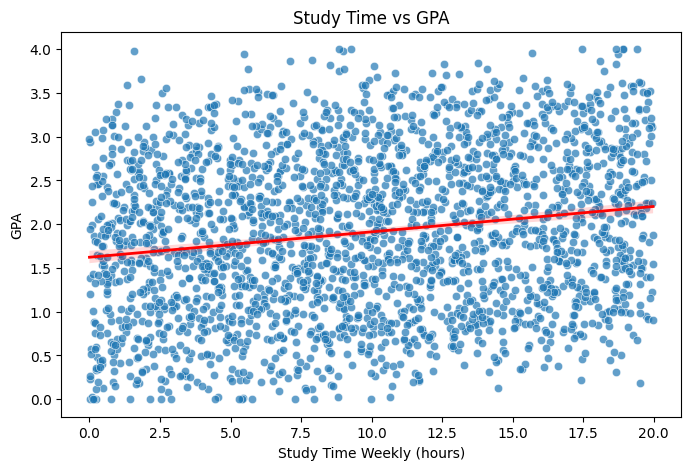

C:\Users\Vaccari\AppData\Local\Temp\ipykernel_7224\3079833584.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=flag_col, y=gpa_col, data=df, palette="Set2")


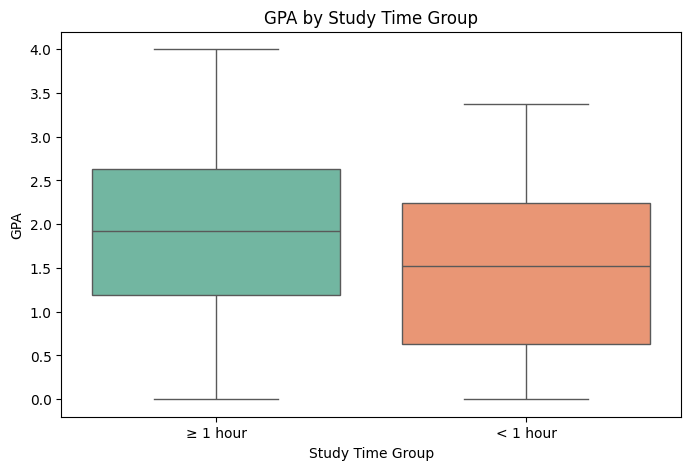

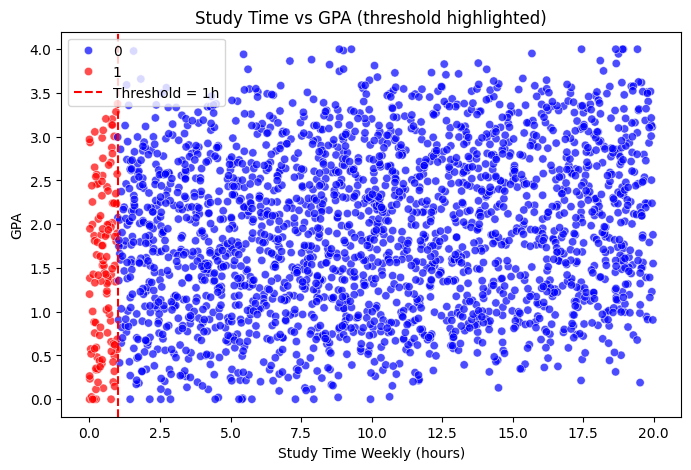

In [30]:
def plot_core_relationships(df, study_time_col="StudyTimeWeekly", gpa_col="GPA", threshold=1):
    # Scatter + linear fit
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=study_time_col, y=gpa_col, data=df, alpha=0.7)
    sns.regplot(x=study_time_col, y=gpa_col, data=df, scatter=False, color="red", line_kws={"linewidth":2})
    plt.xlabel("Study Time Weekly (hours)")
    plt.ylabel("GPA")
    plt.title("Study Time vs GPA")
    plt.show()

    # Threshold flag (if you still want it)
    if threshold is not None:
        flag_col = "StudyTimeThreshold"
        df = df.copy()
        df[flag_col] = (df[study_time_col] < threshold).astype(int)

        plt.figure(figsize=(8,5))
        sns.boxplot(x=flag_col, y=gpa_col, data=df, palette="Set2")
        plt.xticks([0,1], ["≥ 1 hour", "< 1 hour"])
        plt.xlabel("Study Time Group")
        plt.ylabel("GPA")
        plt.title("GPA by Study Time Group")
        plt.show()

        plt.figure(figsize=(8,5))
        sns.scatterplot(x=study_time_col, y=gpa_col, hue=flag_col, palette={0:"blue", 1:"red"}, alpha=0.7, data=df)
        plt.axvline(threshold, color="red", linestyle="--", label=f"Threshold = {threshold}h")
        plt.xlabel("Study Time Weekly (hours)")
        plt.ylabel("GPA")
        plt.title("Study Time vs GPA (threshold highlighted)")
        plt.legend()
        plt.show()

# call when needed
plot_core_relationships(df_cleaned2, "StudyTimeWeekly", "GPA", threshold=1)

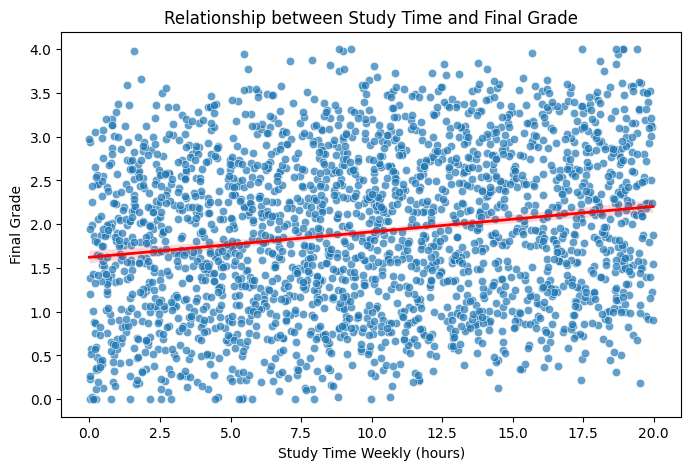

In [31]:
# plotting


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Scatterplot with regression line
sns.scatterplot(x="StudyTimeWeekly", y="GPA", data=df_cleaned2, alpha=0.7)
sns.regplot(x="StudyTimeWeekly", y="GPA", data=df_cleaned2,
            scatter=False, color="red", line_kws={"linewidth":2})

plt.xlabel("Study Time Weekly (hours)")
plt.ylabel("Final Grade")
plt.title("Relationship between Study Time and Final Grade")
plt.show()




C:\Users\Vaccari\AppData\Local\Temp\ipykernel_7224\171155023.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="StudyTimeThreshold", y="GPA", data=df_cleaned2, palette="Set2")


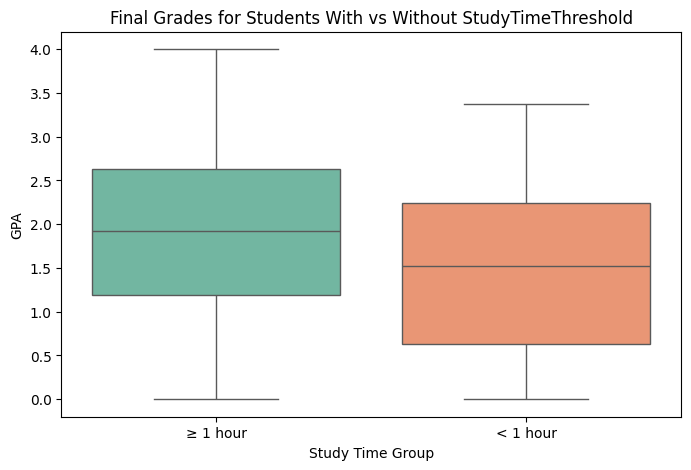

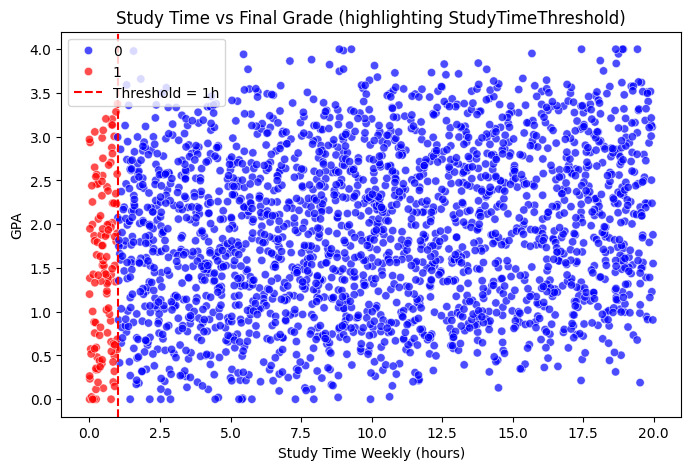

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define threshold for StudyTimeThreshold
threshold = 1  # hour
df_cleaned2["StudyTimeThreshold"] = (df_cleaned2["StudyTimeWeekly"] < threshold).astype(int)

# Plot distribution of grades split by StudyTimeThreshold
plt.figure(figsize=(8,5))
sns.boxplot(x="StudyTimeThreshold", y="GPA", data=df_cleaned2, palette="Set2")

plt.xticks([0,1], ["≥ 1 hour", "< 1 hour"])
plt.xlabel("Study Time Group")
plt.ylabel("GPA")
plt.title("Final Grades for Students With vs Without StudyTimeThreshold")
plt.show()

# Also plot scatter for detailed view
plt.figure(figsize=(8,5))
sns.scatterplot(x="StudyTimeWeekly", y="GPA", hue="StudyTimeThreshold", 
                palette={0:"blue", 1:"red"}, alpha=0.7, data=df_cleaned2)

plt.axvline(threshold, color="red", linestyle="--", label=f"Threshold = {threshold}h")
plt.xlabel("Study Time Weekly (hours)")
plt.ylabel("GPA")
plt.title("Study Time vs Final Grade (highlighting StudyTimeThreshold)")
plt.legend()
plt.show()


In [33]:
# no basic format standardization needed (date time formatting, nom, ntext standardizxartion, no unit coersion needesd)=


In [34]:
# HISTOGRAMS FOR NUMERIC COLS



In [35]:
# END OF STRUCTURAL CLEANUP
df_cleaned2.info()

if "StudyTimeThreshold" in df_cleaned2.columns:
    df_cleaned2 = df_cleaned2.drop(columns=["StudyTimeThreshold"])

utils.save_dataset(df_cleaned2, '02_dataset_structural_cleanup.xlsx')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 2392 non-null   int64   
 1   Gender              2392 non-null   category
 2   Ethnicity           2392 non-null   category
 3   ParentalEducation   2392 non-null   category
 4   StudyTimeWeekly     2392 non-null   float64 
 5   Absences            2392 non-null   int64   
 6   Tutoring            2392 non-null   category
 7   ParentalSupport     2392 non-null   category
 8   Extracurricular     2392 non-null   category
 9   Sports              2392 non-null   category
 10  Music               2392 non-null   category
 11  Volunteering        2392 non-null   category
 12  GPA                 2392 non-null   float64 
 13  StudyTimeThreshold  2392 non-null   int64   
dtypes: category(9), float64(2), int64(3)
memory usage: 115.9 KB
✅ File saved at: C:\Users\Va

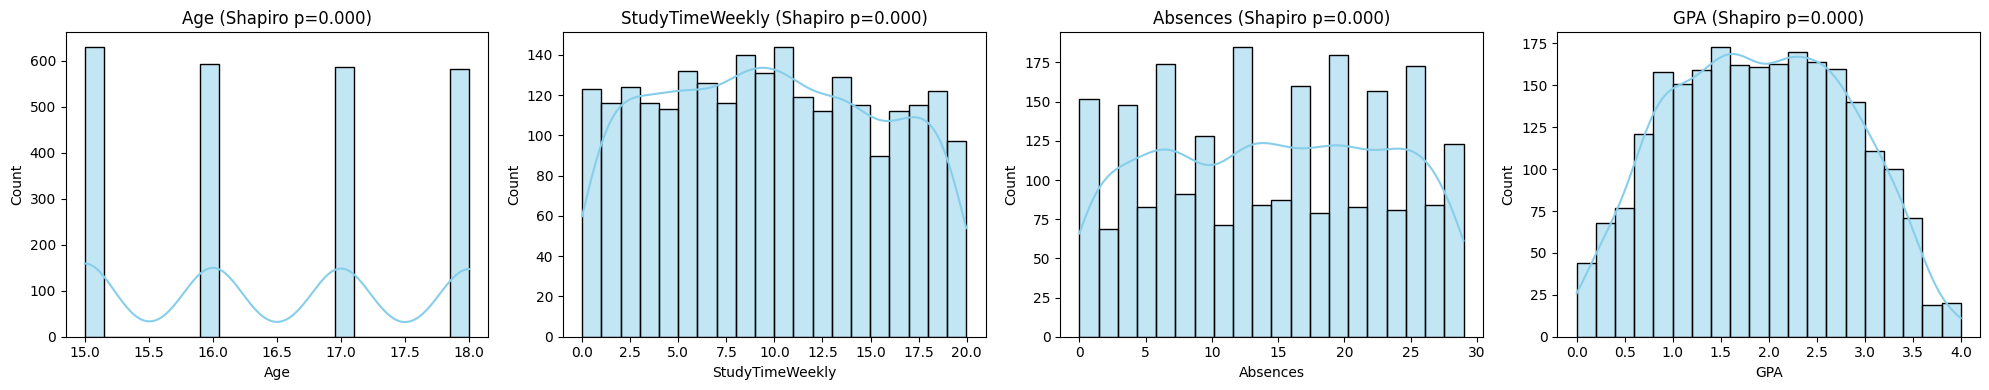

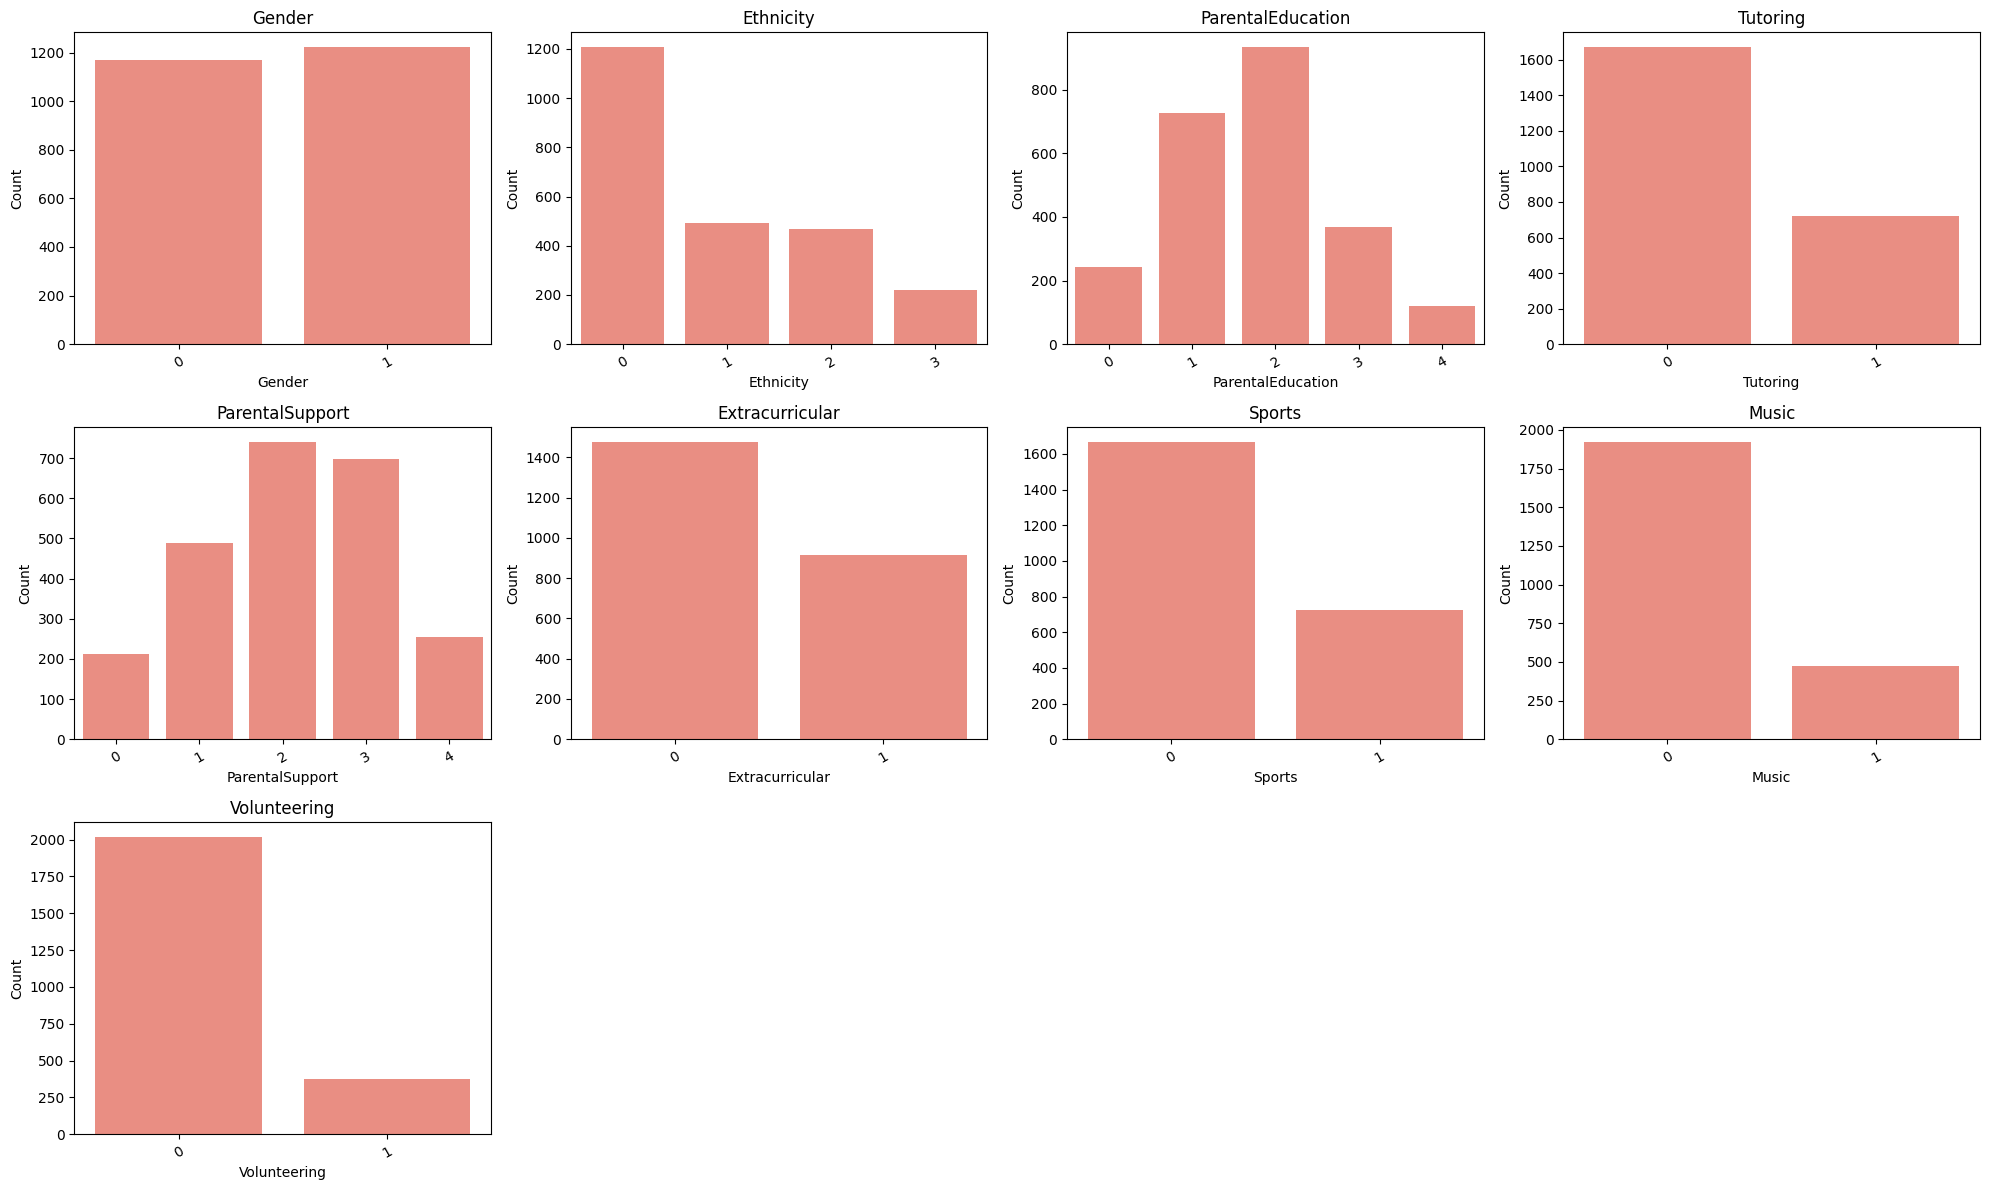

{'Age': {'stat': 0.854282164501672, 'p': 1.8113924197582663e-42, 'normal_at_0.05': False}, 'StudyTimeWeekly': {'stat': 0.9599900520639453, 'p': 3.5935060266828007e-25, 'normal_at_0.05': False}, 'Absences': {'stat': 0.9556810349498007, 'p': 2.2840697519090643e-26, 'normal_at_0.05': False}, 'GPA': {'stat': 0.9838187150154406, 'p': 7.294327280614624e-16, 'normal_at_0.05': False}}


In [36]:


results = utils.plot_distributions_by_type(
    df_cleaned2,
    numeric_cols=numeric_cols,
    categorical_cols=categorical_cols,
    check_normality=True,
    bins=20,
    max_cols_per_row=4
)

# Normality summary for numeric features
print(results["normality"])


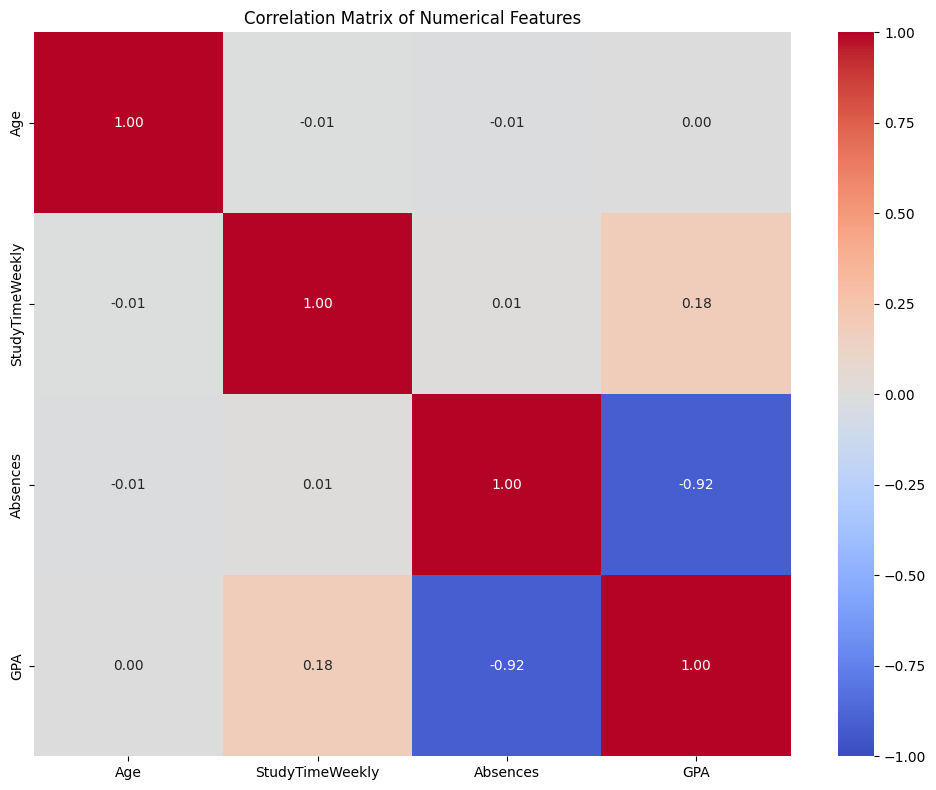

In [37]:


utils.correlations(df_cleaned2, numeric_cols)



# A note on EDA: Using several visualization methods helps uncover hidden patterns. Each plot gives a different perspective on the data.

In [ ]:
 # correlations between numeric and categorical

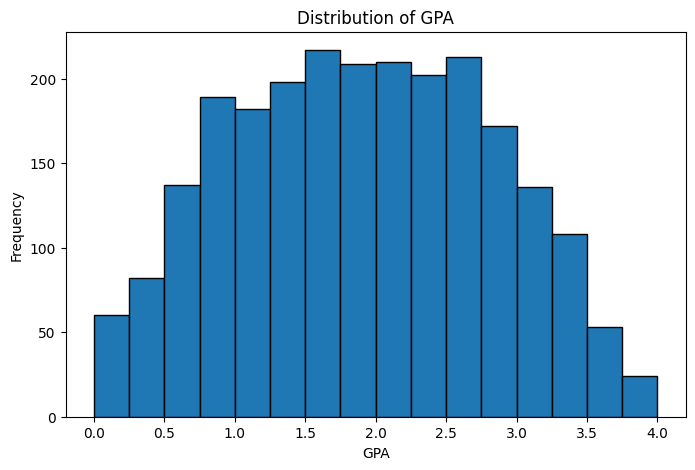

C:\Users\Vaccari\AppData\Local\Temp\ipykernel_7224\1449738158.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_gender, labels=genders)


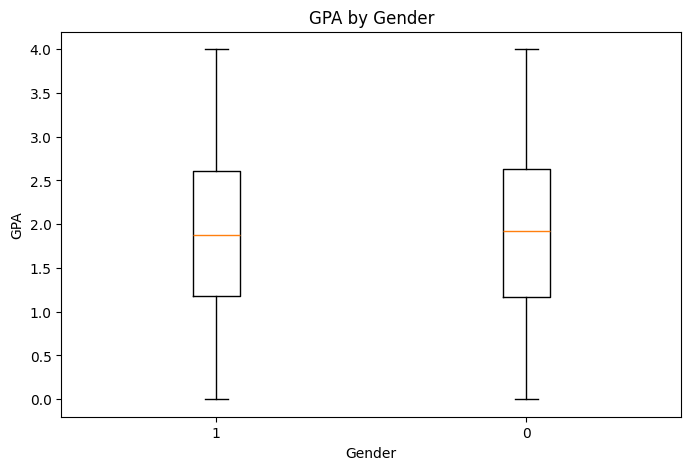

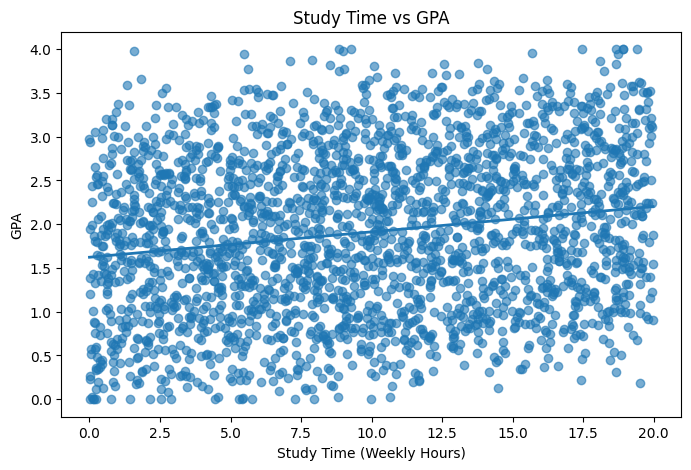


Correlation between Study Time and GPA: 0.18


C:\Users\Vaccari\AppData\Local\Temp\ipykernel_7224\1449738158.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_cat, labels=categories)


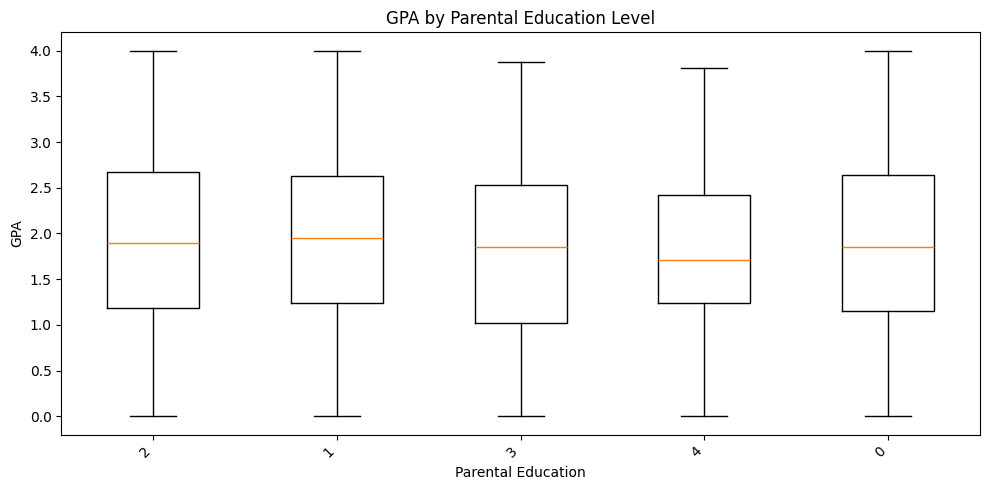


Mean GPA by activity participation:
Extracurricular Sports Music Volunteering  Mean_GPA
              0      0     1            1  2.224461
              0      1     1            0  2.158695
              1      0     1            1  2.140378
              1      1     0            0  2.113293
              1      0     1            0  2.080838
              1      1     1            1  2.078529
              0      1     0            1  2.046358
              0      1     1            1  1.976842
              1      0     0            1  1.971540
              1      0     0            0  1.969871
              0      0     1            0  1.948277
              1      1     0            1  1.940585
              1      1     1            0  1.939433
              0      1     0            0  1.870210
              0      0     0            0  1.752377
              0      0     0            1  1.695164


In [38]:
# ====== 1) GPA Distribution ======
plt.figure(figsize=(8,5))
plt.hist(df_cleaned2["GPA"].dropna(), bins=np.arange(df_cleaned2["GPA"].min(), df_cleaned2["GPA"].max()+0.25, 0.25), edgecolor="black")
plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.show()



# ====== 2) Gender-wise GPA Boxplot ======
if {"Gender", "GPA"}.issubset(df_cleaned2.columns):
    # ensure categorical ordering if needed
    plt.figure(figsize=(8,5))
    genders = df_cleaned2["Gender"].dropna().unique().tolist()
    data_by_gender = [df_cleaned2.loc[df_cleaned2["Gender"] == g, "GPA"].dropna().values for g in genders]
    plt.boxplot(data_by_gender, labels=genders)
    plt.title("GPA by Gender")
    plt.xlabel("Gender")
    plt.ylabel("GPA")
    plt.show()

# ====== 3) Study Time vs GPA (scatter + linear fit) ======
if {"StudyTimeWeekly", "GPA"}.issubset(df_cleaned2.columns):
    x = df_cleaned2["StudyTimeWeekly"]
    y = df_cleaned2["GPA"]
    mask = x.notna() & y.notna()
    xv, yv = x[mask].values, y[mask].values

    plt.figure(figsize=(8,5))
    plt.scatter(xv, yv, alpha=0.6)
    # linear fit
    if len(xv) >= 2:
        m, b = np.polyfit(xv, yv, 1)
        xs = np.linspace(xv.min(), xv.max(), 200)
        plt.plot(xs, m*xs + b, linewidth=2)
    plt.title("Study Time vs GPA")
    plt.xlabel("Study Time (Weekly Hours)")
    plt.ylabel("GPA")
    plt.show()

    # Pearson correlation
    if len(xv) > 1:
        corr = np.corrcoef(xv, yv)[0,1]
        print("\nCorrelation between Study Time and GPA:", round(float(corr), 2))

# ====== 4) GPA by Parental Education ======
if {"ParentalEducation", "GPA"}.issubset(df_cleaned2.columns):
    plt.figure(figsize=(10,5))
    categories = df_cleaned2["ParentalEducation"].dropna().astype(str).unique().tolist()
    data_by_cat = [df_cleaned2.loc[df_cleaned2["ParentalEducation"].astype(str) == c, "GPA"].dropna().values for c in categories]
    plt.boxplot(data_by_cat, labels=categories)
    plt.title("GPA by Parental Education Level")
    plt.xlabel("Parental Education")
    plt.ylabel("GPA")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# ====== 5) Summary: Mean GPA by activity participation ======
activity_cols = ["Extracurricular", "Sports", "Music", "Volunteering"]
present_cols = [c for c in activity_cols if c in df_cleaned2.columns]

if present_cols:
    # Coerce to categorical/binary-friendly strings to avoid weird group keys
    temp = df_cleaned2.copy()
    for c in present_cols:
        temp[c] = temp[c].astype(str)

    activity_summary = (
        temp.groupby(present_cols, dropna=False)["GPA"]
            .mean()
            .reset_index(name="Mean_GPA")
            .sort_values("Mean_GPA", ascending=False)
    )
    print("\nMean GPA by activity participation:")
    print(activity_summary.to_string(index=False))

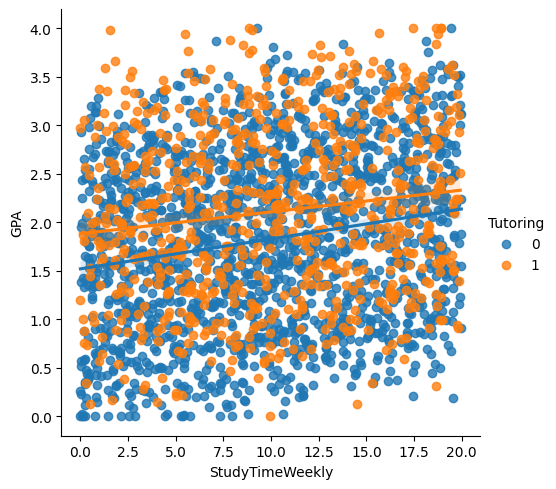

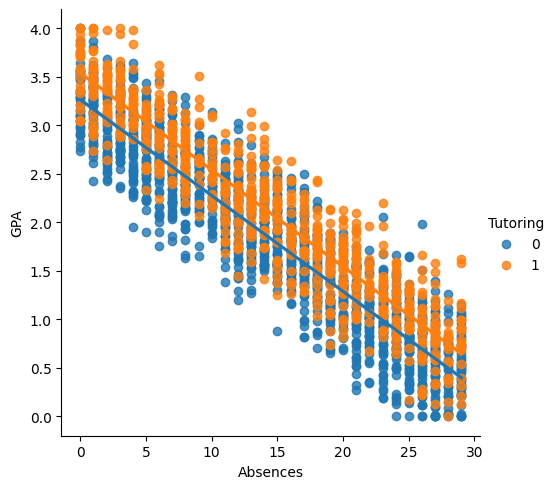

In [41]:
import seaborn as sns
sns.lmplot(data=df_cleaned2, x='StudyTimeWeekly', y='GPA', hue='Tutoring')
plt.show()

sns.lmplot(data=df_cleaned2, x='Absences', y='GPA', hue='Tutoring')
plt.show()

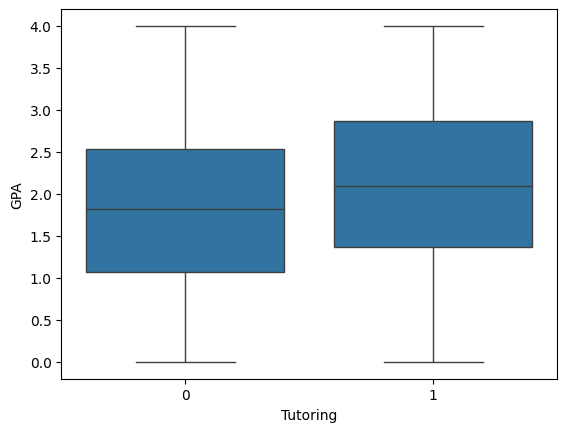

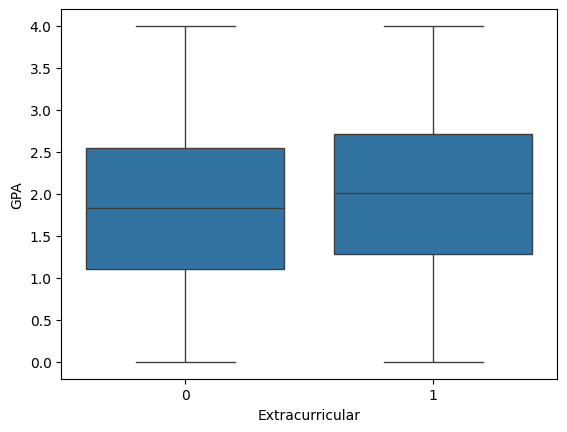

C:\Users\Vaccari\AppData\Local\Temp\ipykernel_7224\2585805709.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  sns.boxplot(data=df_cleaned2.replace({'Gender':{0:'Male', 1:'Female'}}), x='Gender', y='GPA')


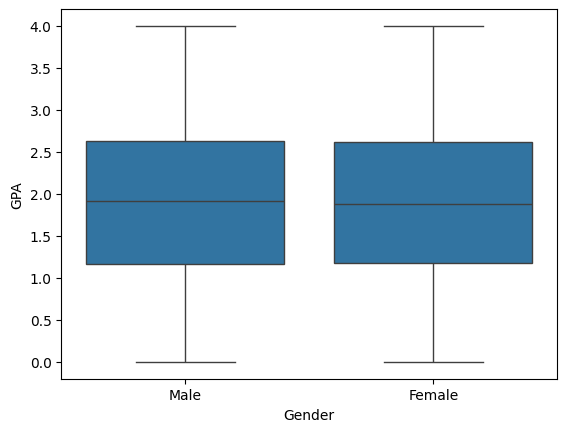

In [42]:
sns.boxplot(data=df_cleaned2, x='Tutoring', y='GPA')
plt.show()
sns.boxplot(data=df_cleaned2, x='Extracurricular', y='GPA')
plt.show()
sns.boxplot(data=df_cleaned2.replace({'Gender':{0:'Male', 1:'Female'}}), x='Gender', y='GPA')
plt.show()

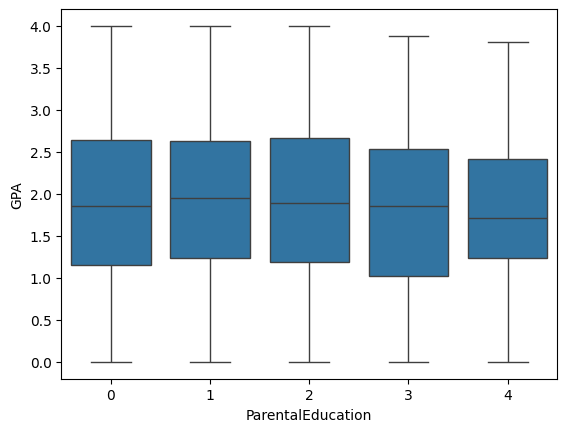

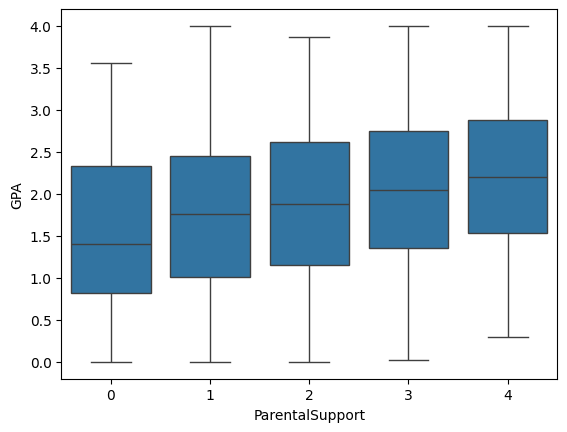

In [43]:
sns.boxplot(data=df_cleaned2, x='ParentalEducation', y='GPA')
plt.show()
sns.boxplot(data=df_cleaned2, x='ParentalSupport', y='GPA')
plt.show()

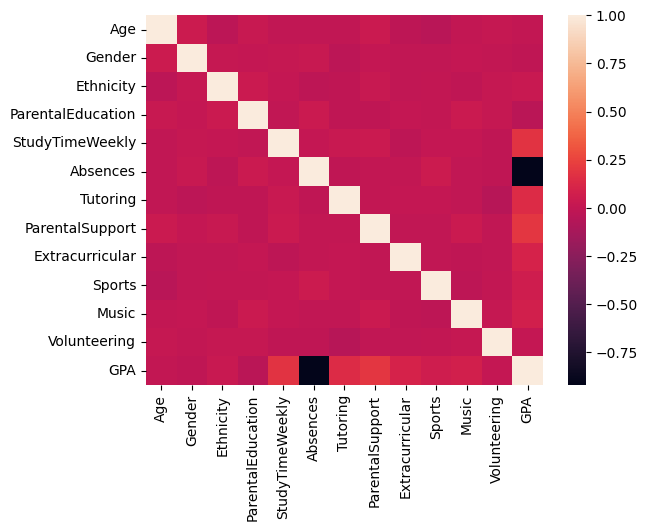

In [44]:
sns.heatmap(data=df_cleaned2.corr())
plt.show()

In [40]:
# DATASET SPLIT

from sklearn.model_selection import train_test_split

# Define features and target
X = df_cleaned2.drop(columns=["GPA"])
y = df_cleaned2["GPA"]

# Create target bins for stratification
y_binned = pd.qcut(y, q=5, labels=False)

# Stratified split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y_binned
)

# Verify target distribution in train/test
print("Training target distribution:")
print(pd.qcut(y_train, q=5).value_counts().sort_index())
print("\nTest target distribution:")
print(pd.qcut(y_test, q=5).value_counts().sort_index())

utils.save_dataset(X_train, '_03_X_train.xlsx')
utils.save_dataset(X_test, '03_X_test.xlsx')
utils.save_dataset(y_train, '03_y_train.xlsx')
utils.save_dataset(y_test, '03_y_test.xlsx')

Training target distribution:
GPA
(-0.001, 1.011]    383
(1.011, 1.609]     382
(1.609, 2.198]     383
(2.198, 2.776]     382
(2.776, 4.0]       383
Name: count, dtype: int64

Test target distribution:
GPA
(-0.001, 1.018]    96
(1.018, 1.618]     96
(1.618, 2.198]     95
(2.198, 2.773]     96
(2.773, 4.0]       96
Name: count, dtype: int64
✅ File saved at: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\processed\_03_X_train.xlsx
✅ File saved at: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\processed\03_X_test.xlsx
✅ File saved at: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\processed\03_y_train.xlsx
✅ File sav